In [68]:
# Imports
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import  matplotlib.pyplot as plt

In [97]:
data = fetch_olivetti_faces()
images = data.images.reshape((-1, 1, 64, 64))
labels = np.arange(len(images))
images_tensor = torch.tensor(images, dtype=torch.float32)
labels_tensor = torch.tensor(data.target, dtype=torch.long)
dataset = torch.utils.data.TensorDataset(images_tensor, labels_tensor)

index_to_split = int(0.2 * len(images))
test_set = torch.utils.data.TensorDataset(images_tensor, labels_tensor)
image, label = test_set[20]
print(image.type())
print(label)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

torch.FloatTensor
tensor(2)


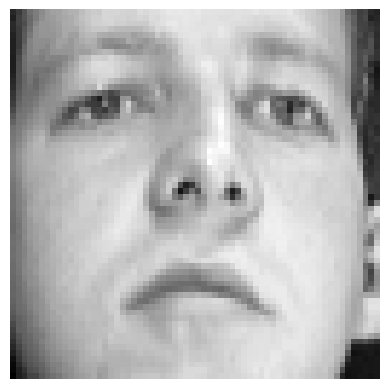

In [70]:
# Display a picture of dataset
def show_picture(picture_index: int):
    image = data.images[picture_index]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
show_picture(8)

In [71]:
# Each picture of the dataset is square 64px x 64px
picture_size = 64

class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(picture_size * picture_size, picture_size * picture_size)
        self.fc2 = nn.Linear(picture_size * picture_size, picture_size * picture_size)
        self.fc3 = nn.Linear(picture_size * picture_size, picture_size * picture_size)
        self.fc4 = nn.Linear(picture_size * picture_size, 40)

    def forward(self, x):
        # Forward pass through the layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [129]:
EPOCH = 100

def trainModel():
    model = CNN_model()
    loss_fonct = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    for epoch in range(EPOCH): #training
        for batch in train_loader:
            optimizer.zero_grad()
            images, labels = batch
            output = model.forward(images.reshape(images.shape[0], 64 * 64))
            loss = loss_fonct(output, labels)
            loss.backward()
            optimizer.step()
        print("loss:", loss.item())

    total, correct = 0, 0
    for image, label in test_set:
        output = model.forward(image.reshape(1, 64 * 64))
        if (output.argmax(dim=1).item() == label):
            correct += 1
        total += 1

    print("Accuracy: ", str(correct / total * 100) + "%")
    if (correct / total * 100 > 95):
        torch.save(model, 'save/model.pt')
    return model

In [128]:
from PIL import Image, ImageTk
from tkinter import Tk, Label
 
def get_image(filename, resize=None):
    image = Image.open(filename).convert('L')
    if resize is not None:
        image = image.resize(resize, Image.ANTIALIAS)
    return ImageTk.PhotoImage(image)

def resize_image(image , size):
    image = image.subsample(size[0], size[1])
    return image


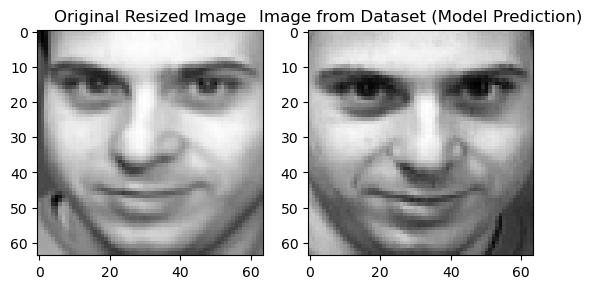

In [132]:
import os.path
from os import path

root = Tk()
if (path.exists("save/model.pt")):
    model = torch.load('save/model.pt')
else :
    model  = trainModel()
#photo = get_image('./test.jpg', )
img = Image.open("./picture_data/picture85.png").convert("L").resize((64, 64), Image.Resampling.LANCZOS)
image_array = np.array(img, dtype=np.float32) / 255.0
tensor_image = torch.FloatTensor(image_array)
output = model.forward(tensor_image.reshape(1, 64 * 64))
image = data.images[output.argmax(dim=1).item() * 10]
plt.subplot(1, 2, 1)
plt.imshow(tensor_image, cmap='gray')
plt.title("Original Resized Image")

# Display the image from the dataset based on the model's prediction
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.title("Image from Dataset (Model Prediction)")

plt.show()

